# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Briana Friendt's Analysis
* After reviewing the plots that I've put together in this assignment, the main conclusion I draw is that, of the four categories, temperature is the only weather aspect that is dependent on latitude. Cloudiness, Humidity and Wind Speed will vary regardless of your location, and can not be reliably predicted using these methods. 

* The temperatures get much colder in the northern latitudes than the southern latitudes, and, as expected, the temperatures near the equator are the highest.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [113]:
# establish a dataframe with the city names so I can iterrate through it with my calls
cities_dict = {'City':cities}
cities_df = pd.DataFrame(cities_dict)

# Add columns for data
cities_df['Cloudiness'] = ''
cities_df['Country'] = ''
cities_df['Date'] = ''
cities_df['Humidity'] = ''
cities_df['Lat'] = ''
cities_df['Lng'] = ''
cities_df['Max Temp'] = ''
cities_df['Temperature (F)'] = ''
cities_df['Wind Speed'] = ''
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Temperature (F),Wind Speed
0,bredasdorp,,,,,,,,,
1,tiksi,,,,,,,,,
2,yurginskoye,,,,,,,,,
3,port elizabeth,,,,,,,,,
4,barrow,,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [114]:
# Create the base url and parameters for the API query by city name
base_url = 'http://api.openweathermap.org/data/2.5/weather'
units = 'imperial'
params = {
    'appid': weather_api_key,
    'units': units
}

print(f'Beginning Data Retrieval')
print(f'--------------------------------')

# Use itterrows to go through the cities in the dataframe
for index, row in cities_df.iterrows():
    
    # Get the city name from the dataframe
    city_name = row['City']
    
    # Add city name to the params
    params['q'] = city_name
    
    # Assemble to url and params and make the request
    response = requests.get(base_url,params=params).json()
    
    # Get the info I need and write it into the dataframe if it exists
    try:
        print(f'Processing Record {index+1} | {city_name}.')
        
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Temperature (F)'] = response['main']['temp']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
                                                
    except (KeyError, IndexError):
        print(f'Unable to find {city_name} in API. Skipping...')
print(f'--------------------------------')
print(f'Data Retrieval Complete')

Beginning Data Retrieval
--------------------------------
Processing Record 1 | bredasdorp.
Processing Record 2 | tiksi.
Processing Record 3 | yurginskoye.
Processing Record 4 | port elizabeth.
Processing Record 5 | barrow.
Processing Record 6 | duluth.
Processing Record 7 | rikitea.
Processing Record 8 | gaggenau.
Processing Record 9 | barentsburg.
Unable to find barentsburg in API. Skipping...
Processing Record 10 | gariaband.
Processing Record 11 | kamenskoye.
Unable to find kamenskoye in API. Skipping...
Processing Record 12 | patos de minas.
Processing Record 13 | ayaviri.
Processing Record 14 | ushuaia.
Processing Record 15 | vaini.
Processing Record 16 | verkh-usugli.
Processing Record 17 | mataura.
Processing Record 18 | karagach.
Processing Record 19 | severo-kurilsk.
Processing Record 20 | ancud.
Processing Record 21 | shibarghan.
Unable to find shibarghan in API. Skipping...
Processing Record 22 | punta arenas.
Processing Record 23 | wampusirpi.
Unable to find wampusirpi in 

Processing Record 217 | lavrentiya.
Processing Record 218 | batemans bay.
Processing Record 219 | buzmeyin.
Processing Record 220 | saint anthony.
Processing Record 221 | ozgon.
Unable to find ozgon in API. Skipping...
Processing Record 222 | sulangan.
Processing Record 223 | lorengau.
Processing Record 224 | fougamou.
Processing Record 225 | lebu.
Processing Record 226 | wagar.
Processing Record 227 | dikson.
Processing Record 228 | provideniya.
Processing Record 229 | jijiga.
Processing Record 230 | komsomolskiy.
Processing Record 231 | lompoc.
Processing Record 232 | pasni.
Processing Record 233 | tyukhtet.
Processing Record 234 | capelinha.
Processing Record 235 | zhezkazgan.
Processing Record 236 | la ronge.
Processing Record 237 | hofn.
Processing Record 238 | skjervoy.
Processing Record 239 | jiayuguan.
Processing Record 240 | beya.
Processing Record 241 | havelock.
Processing Record 242 | tevaitoa.
Processing Record 243 | altay.
Processing Record 244 | baloda.
Processing Record

Processing Record 435 | marigot.
Processing Record 436 | lahat.
Processing Record 437 | tateyama.
Processing Record 438 | nhulunbuy.
Processing Record 439 | zlobin.
Processing Record 440 | vaitupu.
Unable to find vaitupu in API. Skipping...
Processing Record 441 | canala.
Processing Record 442 | gwanda.
Processing Record 443 | limbang.
Processing Record 444 | suwannaphum.
Processing Record 445 | ostrovnoy.
Processing Record 446 | oussouye.
Processing Record 447 | fortuna.
Processing Record 448 | tautira.
Processing Record 449 | ingersoll.
Processing Record 450 | bilibino.
Processing Record 451 | ostersund.
Processing Record 452 | verkhnevilyuysk.
Processing Record 453 | sitka.
Processing Record 454 | tahoua.
Processing Record 455 | starkville.
Processing Record 456 | santa isabel do rio negro.
Processing Record 457 | concordia.
Processing Record 458 | george enescu.
Processing Record 459 | rameswaram.
Processing Record 460 | dubai.
Processing Record 461 | merauke.
Processing Record 462

In [115]:
# Total counts should equal list of cities
cities_df.count()

City               630
Cloudiness         630
Country            630
Date               630
Humidity           630
Lat                630
Lng                630
Max Temp           630
Temperature (F)    630
Wind Speed         630
dtype: int64

In [118]:
# Display dataframe to see blank values starting at 8 per the print statements that generated from my API call loop
cities_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Temperature (F),Wind Speed
0,bredasdorp,2,ZA,1586813742,67,-34.53,20.04,57.2,55.69,5.44
1,tiksi,0,RU,1586813742,87,71.69,128.87,-7.56,-7.56,6.22
2,yurginskoye,56,RU,1586813743,71,56.82,67.39,39.72,39.72,4.54
3,port elizabeth,60,ZA,1586813743,82,-33.92,25.57,59,59,9.17
4,barrow,90,US,1586813623,92,71.29,-156.79,26.6,26.6,6.93
5,duluth,90,US,1586813569,54,46.78,-92.11,36,31.42,17.22
6,rikitea,93,PF,1586813743,69,-23.12,-134.97,77,77,10.33
7,gaggenau,13,DE,1586813743,61,48.8,8.33,46.99,43.84,8.05
8,barentsburg,,,,,,,,,
9,gariaband,0,IN,1586813743,20,20.64,82.06,79.95,79.95,2.26


In [119]:
# Replace the blank cells with NaN then drop NaN rows
cities_df.replace('', np.nan, inplace=True)
cities_df.dropna(how='any',inplace=True)
cities_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Temperature (F),Wind Speed
0,bredasdorp,2.0,ZA,1.586814e+09,67.0,-34.53,20.04,57.20,55.69,5.44
1,tiksi,0.0,RU,1.586814e+09,87.0,71.69,128.87,-7.56,-7.56,6.22
2,yurginskoye,56.0,RU,1.586814e+09,71.0,56.82,67.39,39.72,39.72,4.54
3,port elizabeth,60.0,ZA,1.586814e+09,82.0,-33.92,25.57,59.00,59.00,9.17
4,barrow,90.0,US,1.586814e+09,92.0,71.29,-156.79,26.60,26.60,6.93
5,duluth,90.0,US,1.586814e+09,54.0,46.78,-92.11,36.00,31.42,17.22
6,rikitea,93.0,PF,1.586814e+09,69.0,-23.12,-134.97,77.00,77.00,10.33
7,gaggenau,13.0,DE,1.586814e+09,61.0,48.80,8.33,46.99,43.84,8.05
9,gariaband,0.0,IN,1.586814e+09,20.0,20.64,82.06,79.95,79.95,2.26
11,patos de minas,37.0,BR,1.586814e+09,67.0,-18.58,-46.52,71.08,71.08,3.40


In [120]:
# Correct formatting of the unix Date column
cities_df['Date'] = cities_df['Date'].astype(np.int64)
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Temperature (F),Wind Speed
0,bredasdorp,2.0,ZA,1586813742,67.0,-34.53,20.04,57.20,55.69,5.44
1,tiksi,0.0,RU,1586813742,87.0,71.69,128.87,-7.56,-7.56,6.22
2,yurginskoye,56.0,RU,1586813743,71.0,56.82,67.39,39.72,39.72,4.54
3,port elizabeth,60.0,ZA,1586813743,82.0,-33.92,25.57,59.00,59.00,9.17
4,barrow,90.0,US,1586813623,92.0,71.29,-156.79,26.60,26.60,6.93


In [133]:
# Export dataframe to csv file
cities_df.to_csv('WeatherPy.csv')

In [121]:
# Pulled too much info from API, narrowing down dataframe
df_for_plots = cities_df.loc[:,['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']]
df_for_plots.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.53,20.04,57.20,67.0,2.0,5.44,ZA,1586813742
1,tiksi,71.69,128.87,-7.56,87.0,0.0,6.22,RU,1586813742
2,yurginskoye,56.82,67.39,39.72,71.0,56.0,4.54,RU,1586813743
3,port elizabeth,-33.92,25.57,59.00,82.0,60.0,9.17,ZA,1586813743
4,barrow,71.29,-156.79,26.60,92.0,90.0,6.93,US,1586813623


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [122]:
# Find Humidity values over 100
too_much_humid = cities_df.loc[(cities_df['Humidity']>100),:]
too_much_humid.count()

City               0
Cloudiness         0
Country            0
Date               0
Humidity           0
Lat                0
Lng                0
Max Temp           0
Temperature (F)    0
Wind Speed         0
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

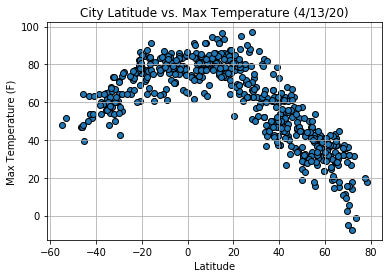

In [124]:
# Setup variables
x_values = df_for_plots['Lat']
y_values = df_for_plots['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temperature (F)'
title = 'City Latitude vs. Max Temperature (4/13/20)'

# Plot using variables
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.grid()
plt.show()

* This scatter plot is a good representation of the fact that the maximum temperature rises as the latitude is near the equator (latitude of 0). The max temperatures also appear to get colder in the northern hemisphere (latitude above 0), than the southern hemisphere (latitude below 0).

## Latitude vs. Humidity Plot

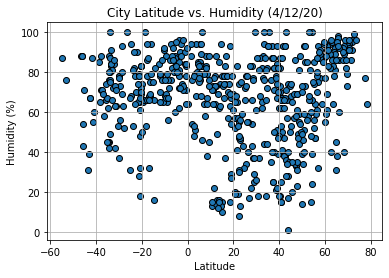

In [63]:
# Setup variables
x_values = df_for_plots['Lat']
y_values = df_for_plots['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
title = 'City Latitude vs. Humidity (4/13/20)'

# Plot using variables
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.grid()
plt.show()

* Regardless of latitude location, there are many more cities in the dataset with humidity above 60%. In addition, cities in the northern hemisphere (latitude above 0) appear to be more humid.

## Latitude vs. Cloudiness Plot

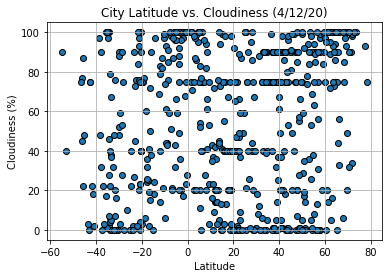

In [64]:
# Setup variables
x_values = df_for_plots['Lat']
y_values = df_for_plots['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
title = 'City Latitude vs. Cloudiness (4/13/20)'

# Plot using variables
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.grid()
plt.show()

* It appears to be common for a city in any latitude to have a cloudiness percentage around 0%, 20%, 40%, 75% and 100%.

## Latitude vs. Wind Speed Plot

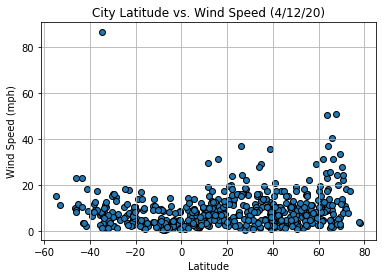

In [65]:
# Setup variables
x_values = df_for_plots['Lat']
y_values = df_for_plots['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
title = 'City Latitude vs. Wind Speed (4/13/20)'

# Plot using variables
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.grid()
plt.show()

* Outside of one very high wind speed outlier in the southern hemisphere (latitude below 0), wind speeds are generally between 0-20 mph for all latitudes, with the next highest wind speeds at latitudes above 60.

## Linear Regression

In [83]:
# Create a function to create Linear Regression plots
def LinearRegression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
    return regress_values, line_eq, rvalue

In [84]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df_for_plots.loc[(df_for_plots['Lat']>=0),:]
southern_df = df_for_plots.loc[(df_for_plots['Lat']<=0),:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8.


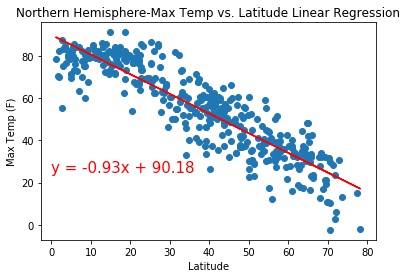

In [125]:
# Setup variables
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp (F)'
title = 'Northern Hemisphere-Max Temp vs. Latitude Linear Regression'

# Call function for linear regression
regress_values, line_eq, rvalue = LinearRegression(x_values,y_values)

# Plot using variables
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
print(f'The r-squared is: {round(rvalue**2,2)}.')
plt.show()

* Based on the r-squared value of .8 and seeing how the points fit so closely to the line, you can say that there is a strong correlation between maximum temperature and latitude in the northern hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49.


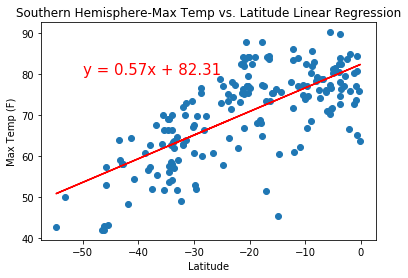

In [126]:
# Setup variables
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp (F)'
title = 'Southern Hemisphere-Max Temp vs. Latitude Linear Regression'

# Call function for linear regression
regress_values, line_eq, rvalue = LinearRegression(x_values,y_values)

# Plot using variables
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
print(f'The r-squared is: {round(rvalue**2,2)}.')
plt.show()

* Based on the r-squared value of .5 and seeing how the points follow the line relatively, you can say that there is a moderate correlation between maximum temperature and latitude in the southern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04.


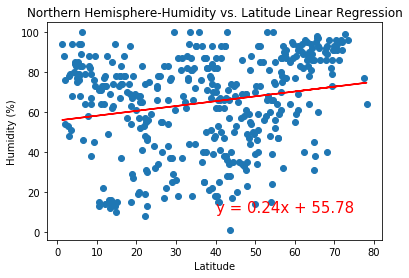

In [127]:
# Setup variables
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
title = 'Northern Hemisphere-Humidity vs. Latitude Linear Regression'

# Call function for linear regression
regress_values, line_eq, rvalue = LinearRegression(x_values,y_values)

# Plot using variables
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
print(f'The r-squared is: {round(rvalue**2,2)}.')
plt.show()

* Based on the r-squared value of .04 and seeing how the points do not follow much of a line, you can say that there is very weak correlation, if not, no correlation between humidity and latitude in the northern hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06.


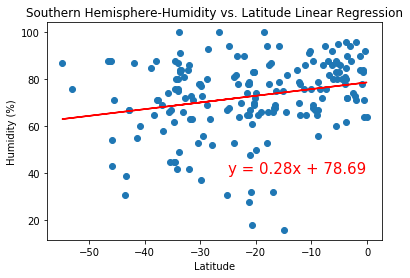

In [128]:
# Setup variables
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
title = 'Southern Hemisphere-Humidity vs. Latitude Linear Regression'

# Call function for linear regression
regress_values, line_eq, rvalue = LinearRegression(x_values,y_values)

# Plot using variables
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
print(f'The r-squared is: {round(rvalue**2,2)}.')
plt.show()

* Based on the r-squared value of .06 and seeing how the points barely cluster along the line, you can say that there is very weak correlation, if not, no correlation between humidity and latitude in the southern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04.


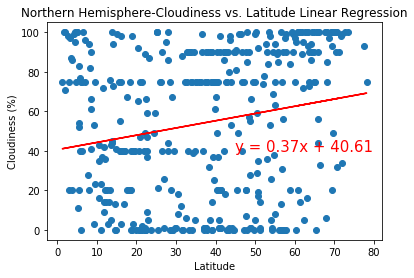

In [129]:
# Setup variables
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
title = 'Northern Hemisphere-Cloudiness vs. Latitude Linear Regression'

# Call function for linear regression
regress_values, line_eq, rvalue = LinearRegression(x_values,y_values)

# Plot using variables
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
print(f'The r-squared is: {round(rvalue**2,2)}.')
plt.show()

* Based on the r-squared value of .04 and seeing how the points do not follow much of a single line, you can say that there is very weak correlation, if not, no correlation between cloudiness and latitude in the northern hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1.


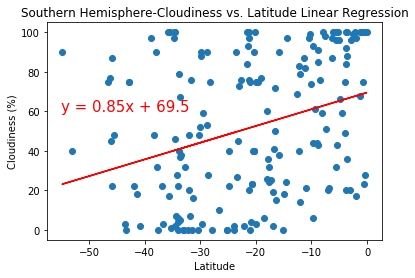

In [130]:
# Setup variables
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
title = 'Southern Hemisphere-Cloudiness vs. Latitude Linear Regression'

# Call function for linear regression
regress_values, line_eq, rvalue = LinearRegression(x_values,y_values)

# Plot using variables
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
print(f'The r-squared is: {round(rvalue**2,2)}.')
plt.show()

* Based on the r-squared value of .1 and seeing how the points do not follow much of a single line, you can say that there is very weak correlation, if not, no correlation between cloudiness and latitude in the southern hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04.


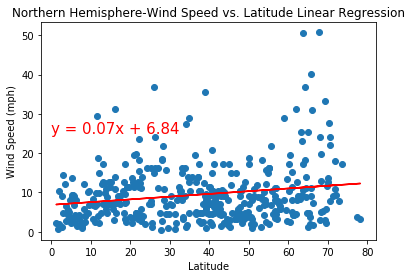

In [131]:
# Setup variables
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
title = 'Northern Hemisphere-Wind Speed vs. Latitude Linear Regression'

# Call function for linear regression
regress_values, line_eq, rvalue = LinearRegression(x_values,y_values)

# Plot using variables
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
print(f'The r-squared is: {round(rvalue**2,2)}.')
plt.show()

* The r-squared value of .04 would indicate very weak, if not, no correlation between wind speed and latitude in the northern hemisphere. Although, looking at the plot, it would appear that the majority of the points do follow the line. This may be due to the limitations of the r-squared value.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09.


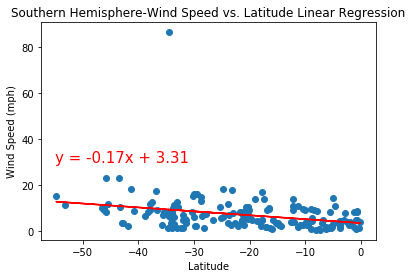

In [132]:
# Setup variables
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'
title = 'Southern Hemisphere-Wind Speed vs. Latitude Linear Regression'

# Call function for linear regression
regress_values, line_eq, rvalue = LinearRegression(x_values,y_values)

# Plot using variables
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
print(f'The r-squared is: {round(rvalue**2,2)}.')
plt.show()

* Once again, the r-squared value of .09 would indicate very weak, if not, no correlation between wind speed and latitude in the southern hemisphere. Although, looking at the plot, it would appear that the majority of the points do follow the line. This may be due to the limitations of the r-squared value.